# Problem Statement on Fraud Transaction Detection:
1. As there is a very little amount of transaction that are fraudulent, 
2. It is probably necessary to use a balancing technique in order to obtain better results.
3. fraud can be any where like thorugh the banking, netbanking,phone banking or else google pay or phone pay.

# Importing All basic libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Split the data
from sklearn.model_selection import train_test_split
#Build all model

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import classification_report,r2_score,accuracy_score,confusion_matrix

import warnings
warnings.filterwarnings('ignore')

# Discription about basic libraries and Algorithms:
1. Numpy is using for the mathmetical operations.
2. Pandas is using for the data manipulation and analysis
3. Matplotlib and seaborn is using for the data plotting and data visualization
4. Sklearn(scikit learn) used for to machine learning algorithms and evaluation metrics

# Importing data and read csv file

In [2]:
df=pd.read_csv('Final Transactions.csv')

In [3]:
df.head()

,Unnamed: 0,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENARIO
0,0,0,2023-01-01 00:00:31,596,3156,533.07,31,0,0,0
1,1,1,2023-01-01 00:02:10,4961,3412,808.56,130,0,0,0
2,2,2,2023-01-01 00:07:56,2,1365,1442.94,476,0,1,1
3,3,3,2023-01-01 00:09:29,4128,8737,620.65,569,0,0,0
4,4,4,2023-01-01 00:10:34,927,9906,490.66,634,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1754155 entries, 0 to 1754154
Data columns (total 10 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Unnamed: 0         int64  
 1   TRANSACTION_ID     int64  
 2   TX_DATETIME        object 
 3   CUSTOMER_ID        int64  
 4   TERMINAL_ID        int64  
 5   TX_AMOUNT          float64
 6   TX_TIME_SECONDS    int64  
 7   TX_TIME_DAYS       int64  
 8   TX_FRAUD           int64  
 9   TX_FRAUD_SCENARIO  int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 133.8+ MB


# Explorary Data Analysis

1. Drop the column of unnamed
2. Used mean , median, and mode for fill the missing value
3. Used label encoding for fit the dataset 

In [5]:
df.drop(columns='Unnamed: 0',inplace=True)

In [6]:
df.isnull().sum()

TRANSACTION_ID       0
TX_DATETIME          0
CUSTOMER_ID          0
TERMINAL_ID          0
TX_AMOUNT            0
TX_TIME_SECONDS      0
TX_TIME_DAYS         0
TX_FRAUD             0
TX_FRAUD_SCENARIO    0
dtype: int64

In [7]:
df.shape

(1754155, 9)

 The data has 1754155 rows and 8 are features column and 1 is target columns

# Data discription:
1. Total 9 columns are there in this dataset.
2. Total entries are 1754155.
3. Drop the column of Unnamed becasue there is no sense of this column in this datasets
4. No null values are there in this data set.
5. What is the target Columns?
6. Target column is TX_fraud it is basis on the transaction details.

# (Exploratory Analysis)Data Cleaning And preprocessing
the columns from data sets

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
le=LabelEncoder()

In [10]:
df['TX_DATETIME']=le.fit_transform(df['TX_DATETIME'])
df['TX_DATETIME']

0                0
1                1
2                2
3                3
4                4
            ...   
1754150    1635071
1754151    1635072
1754152    1635073
1754153    1635074
1754154    1635075
Name: TX_DATETIME, Length: 1754155, dtype: int32

In [11]:
df.describe()

,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENARIO
count,1.754155e+06,1.754155e+06,1.754155e+06,1.754155e+06,1.754155e+06,1.754155e+06,1.754155e+06,1.754155e+06,1.754155e+06
mean,8.770770e+05,8.174692e+05,2.504011e+03,4.996733e+03,5.396820e+02,7.903234e+06,9.097260e+01,1.345200e-01,1.449746e-01
std,5.063811e+05,4.719914e+05,1.445987e+03,2.886101e+03,1.179711e+03,4.565172e+06,5.283709e+01,3.412103e-01,3.874872e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.385385e+05,4.086905e+05,1.252000e+03,2.502000e+03,1.799500e+02,3.940846e+06,4.500000e+01,0.000000e+00,0.000000e+00
50%,8.770770e+05,8.175300e+05,2.506000e+03,4.994000e+03,4.217500e+02,7.902670e+06,9.100000e+01,0.000000e+00,0.000000e+00
75%,1.315616e+06,1.226238e+06,3.765000e+03,7.495000e+03,7.505950e+02,1.186566e+07,1.370000e+02,0.000000e+00,0.000000e+00
max,1.754154e+06,1.635075e+06,4.999000e+03,9.999000e+03,6.478375e+05,1.581120e+07,1.820000e+02,1.000000e+00,3.000000e+00


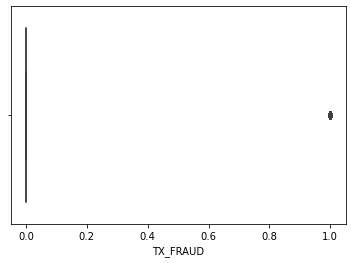

In [12]:
#To chack the outliers in the columns
sns.boxplot(df.TX_FRAUD)
plt.show()

In [13]:
df.corr().style.background_gradient(cmap='coolwarm')

,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENARIO
TRANSACTION_ID,1.000000,1.000000,-0.000389,-0.000690,0.002455,0.999999,0.999985,0.002650,0.004748
TX_DATETIME,1.000000,1.000000,-0.000389,-0.000690,0.002454,0.999999,0.999985,0.002650,0.004748
CUSTOMER_ID,-0.000389,-0.000389,1.000000,0.000389,-0.002633,-0.000389,-0.000389,0.004353,0.002359
TERMINAL_ID,-0.000690,-0.000690,0.000389,1.000000,-0.000758,-0.000690,-0.000690,-0.002160,-0.003291
TX_AMOUNT,0.002455,0.002454,-0.002633,-0.000758,1.000000,0.002453,0.002449,0.313427,0.416883
TX_TIME_SECONDS,0.999999,0.999999,-0.000389,-0.000690,0.002453,1.000000,0.999992,0.002650,0.004746
TX_TIME_DAYS,0.999985,0.999985,-0.000389,-0.000690,0.002449,0.999992,1.000000,0.002650,0.004746
TX_FRAUD,0.002650,0.002650,0.004353,-0.002160,0.313427,0.002650,0.002650,1.000000,0.949008
TX_FRAUD_SCENARIO,0.004748,0.004748,0.002359,-0.003291,0.416883,0.004746,0.004746,0.949008,1.000000


In [ ]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1754155 entries, 0 to 1754154
Data columns (total 9 columns):
 #   Column             Dtype  
---  ------             -----  
 0   TRANSACTION_ID     int64  
 1   TX_DATETIME        int32  
 2   CUSTOMER_ID        int64  
 3   TERMINAL_ID        int64  
 4   TX_AMOUNT          float64
 5   TX_TIME_SECONDS    int64  
 6   TX_TIME_DAYS       int64  
 7   TX_FRAUD           int64  
 8   TX_FRAUD_SCENARIO  int64  
dtypes: float64(1), int32(1), int64(7)
memory usage: 113.8 MB


In [15]:
df.columns

Index(['TRANSACTION_ID', 'TX_DATETIME', 'CUSTOMER_ID', 'TERMINAL_ID',
       'TX_AMOUNT', 'TX_TIME_SECONDS', 'TX_TIME_DAYS', 'TX_FRAUD',
       'TX_FRAUD_SCENARIO'],
      dtype='object')

# Seperate the data in X & y

In [16]:
x=df.iloc[:,[0,1,2,3,4,5,6,8]]
x

,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD_SCENARIO
0,0,0,596,3156,533.07,31,0,0
1,1,1,4961,3412,808.56,130,0,0
2,2,2,2,1365,1442.94,476,0,1
3,3,3,4128,8737,620.65,569,0,0
4,4,4,927,9906,490.66,634,0,0
...,...,...,...,...,...,...,...,...
1754150,1754150,1635071,161,655,531.43,15810996,182,0
1754151,1754151,1635072,4342,6181,10.40,15811058,182,0
1754152,1754152,1635073,618,1502,26.62,15811101,182,0
1754153,1754153,1635074,4056,3067,550.43,15811192,182,0


In [17]:
x=df.iloc[:,[0,1,2,3,4,5,6,8]].values
x

array([[0.0000000e+00, 0.0000000e+00, 5.9600000e+02, ..., 3.1000000e+01,
        0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 1.0000000e+00, 4.9610000e+03, ..., 1.3000000e+02,
        0.0000000e+00, 0.0000000e+00],
       [2.0000000e+00, 2.0000000e+00, 2.0000000e+00, ..., 4.7600000e+02,
        0.0000000e+00, 1.0000000e+00],
       ...,
       [1.7541520e+06, 1.6350730e+06, 6.1800000e+02, ..., 1.5811101e+07,
        1.8200000e+02, 0.0000000e+00],
       [1.7541530e+06, 1.6350740e+06, 4.0560000e+03, ..., 1.5811192e+07,
        1.8200000e+02, 0.0000000e+00],
       [1.7541540e+06, 1.6350750e+06, 3.5420000e+03, ..., 1.5811197e+07,
        1.8200000e+02, 0.0000000e+00]])

In x column we store only feature.

In [18]:
y=df['TX_FRAUD']
y

0          0
1          0
2          1
3          0
4          0
          ..
1754150    0
1754151    0
1754152    0
1754153    0
1754154    0
Name: TX_FRAUD, Length: 1754155, dtype: int64

In [19]:
y=df['TX_FRAUD'].values
y

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [20]:
df['TX_FRAUD'].value_counts()

0    1518186
1     235969
Name: TX_FRAUD, dtype: int64

 Y column is target column of the dataset

# Split the data

In [21]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=1)

In [22]:
xtrain,xtest,ytrain,ytest

(array([[4.260860e+05, 3.971530e+05, 3.722000e+03, ..., 3.839456e+06,
         4.400000e+01, 0.000000e+00],
        [3.501440e+05, 3.263510e+05, 8.020000e+02, ..., 3.152314e+06,
         3.600000e+01, 0.000000e+00],
        [1.008101e+06, 9.396120e+05, 3.837000e+03, ..., 9.092795e+06,
         1.050000e+02, 0.000000e+00],
        ...,
        [4.709240e+05, 4.389390e+05, 4.420000e+03, ..., 4.245246e+06,
         4.900000e+01, 0.000000e+00],
        [4.917550e+05, 4.583760e+05, 1.480000e+03, ..., 4.433411e+06,
         5.100000e+01, 0.000000e+00],
        [1.280370e+05, 1.193530e+05, 1.114000e+03, ..., 1.158550e+06,
         1.300000e+01, 0.000000e+00]]),
 array([[1.6931270e+06, 1.5780710e+06, 3.4980000e+03, ..., 1.5254775e+07,
         1.7600000e+02, 0.0000000e+00],
        [1.2419740e+06, 1.1575230e+06, 3.4450000e+03, ..., 1.1190625e+07,
         1.2900000e+02, 1.0000000e+00],
        [1.1877500e+05, 1.1073500e+05, 1.3190000e+03, ..., 1.0745690e+06,
         1.2000000e+01, 1.0000000e+

# Import all model before handle oversampling the data

In [23]:
#lr=LinearRegression()
lreg=LogisticRegression()
knn=KNeighborsClassifier()
dt=DecisionTreeClassifier()
svm=SVC()
rfc=RandomForestClassifier()
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

# Build function of model to store the data in my model

In [24]:
def mymodel(model):
    model.fit(xtrain,ytrain)
    ypred = model.predict(xtest)
    
    train=model.score(xtrain,ytrain)
    test=model.score(xtest,ytest)
    
    print(f"Training Accuracy:- {train}\n Testing Accuracy:- {test}")
    print(classification_report(ytest, ypred))
    
    return model

In [25]:
mymodel(lreg)

Training Accuracy:- 0.8934912061815706
 Testing Accuracy:- 0.8940440515575385
              precision    recall  f1-score   support

           0       0.94      0.94      0.94    455263
           1       0.61      0.61      0.61     70984

    accuracy                           0.89    526247
   macro avg       0.77      0.78      0.77    526247
weighted avg       0.89      0.89      0.89    526247



LogisticRegression()

# Logistic Regression 
Thorugh this will get 89% percent of the accuracy

# My Model(svm) 
The main disadvantages of svm is not working on large data set it will take more to time to predict the data 

In [26]:
#From knn will get 88 % accuracy and precesion is also good.
mymodel(knn)

Training Accuracy:- 0.9105853207243539
 Testing Accuracy:- 0.8837219024526506
              precision    recall  f1-score   support

           0       0.89      0.99      0.94    455263
           1       0.83      0.17      0.29     70984

    accuracy                           0.88    526247
   macro avg       0.86      0.58      0.61    526247
weighted avg       0.88      0.88      0.85    526247



KNeighborsClassifier()

In [27]:
#From decision tree will get 100 % accuracy,precision,recall and f1 score
mymodel(dt)

Training Accuracy:- 1.0
 Testing Accuracy:- 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    455263
           1       1.00      1.00      1.00     70984

    accuracy                           1.00    526247
   macro avg       1.00      1.00      1.00    526247
weighted avg       1.00      1.00      1.00    526247



DecisionTreeClassifier()

In [28]:
#From Random foreset classifier also will get 100 % accuracy.
mymodel(rfc)

Training Accuracy:- 1.0
 Testing Accuracy:- 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    455263
           1       1.00      1.00      1.00     70984

    accuracy                           1.00    526247
   macro avg       1.00      1.00      1.00    526247
weighted avg       1.00      1.00      1.00    526247



RandomForestClassifier()

In [29]:
mymodel(gnb)

Training Accuracy:- 0.9176632125533835
 Testing Accuracy:- 0.9179738791860096
              precision    recall  f1-score   support

           0       0.91      1.00      0.95    455263
           1       1.00      0.39      0.56     70984

    accuracy                           0.92    526247
   macro avg       0.96      0.70      0.76    526247
weighted avg       0.93      0.92      0.90    526247



GaussianNB()

In [30]:
mymodel(mnb)

Training Accuracy:- 0.763088928486499
 Testing Accuracy:- 0.7627558921951099
              precision    recall  f1-score   support

           0       0.95      0.76      0.85    455263
           1       0.33      0.76      0.46     70984

    accuracy                           0.76    526247
   macro avg       0.64      0.76      0.66    526247
weighted avg       0.87      0.76      0.80    526247



MultinomialNB()

In [31]:
mymodel(bnb)

Training Accuracy:- 1.0
 Testing Accuracy:- 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    455263
           1       1.00      1.00      1.00     70984

    accuracy                           1.00    526247
   macro avg       1.00      1.00      1.00    526247
weighted avg       1.00      1.00      1.00    526247



BernoulliNB()

# Accuracy of all module of the model
1. Logistic Regression of accuracy is 89%
Training Accuracy:-   0.8934912061815706
Testing Accuracy:-    0.8940440515575385
2. KNeighbors Classifier of accuracy is 88%.
Training Accuracy:-   0.9105853207243539
Testing Accuracy:-    0.8837219024526506
3. Decision Tree classifier of accuracy is 100%
Training Accuracy:-   1.0
Testing Accuracy:-    1.0
4. Svm is not working because dataset is so large i.e. svm is not worked on large dataset
5. Random foreset accuracy is also 100%.
Training Accuracy:-   1.0
Testing Accuracy:-    1.0
6. Gaussian Naive bayas accuracy is a 92%
Training Accuracy:-   0.9176632125533835
Testing Accuracy:-    0.9179738791860096
7. Multinomial naive bayas accuracy is a 76%
Training Accuracy:-   1.0
Testing Accuracy:-    1.0
8. Bernoulli naive bayas accuracy is a 100%
Training Accuracy:-   1.0
Testing Accuracy:-    1.0

# Importing the module for handling the oversampling

In [32]:
!pip install imblearn

# Handle Oversampling Datasets

In [33]:
from imblearn.over_sampling import RandomOverSampler

In [34]:
ros = RandomOverSampler(random_state=1)

In [35]:
x,y= ros.fit_resample(xtrain,ytrain)

In [36]:
pd.Series(y).value_counts()

0    1062923
1    1062923
dtype: int64

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1754155 entries, 0 to 1754154
Data columns (total 9 columns):
 #   Column             Dtype  
---  ------             -----  
 0   TRANSACTION_ID     int64  
 1   TX_DATETIME        int32  
 2   CUSTOMER_ID        int64  
 3   TERMINAL_ID        int64  
 4   TX_AMOUNT          float64
 5   TX_TIME_SECONDS    int64  
 6   TX_TIME_DAYS       int64  
 7   TX_FRAUD           int64  
 8   TX_FRAUD_SCENARIO  int64  
dtypes: float64(1), int32(1), int64(7)
memory usage: 113.8 MB


# Evaluate the model

In [38]:
lreg=LogisticRegression()
knn=KNeighborsClassifier()
dt=DecisionTreeClassifier()
svm=SVC()
rfc=RandomForestClassifier()
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [39]:
def mymodel(model):
    model.fit(xtrain,ytrain)
    ypred = model.predict(xtest)
    
    train=model.score(xtrain,ytrain)
    test=model.score(xtest,ytest)
    
    print(f"Training Accuracy:- {train}\n Testing Accuracy:- {test}")
    print(classification_report(ytest, ypred))
    
    return model

In [40]:
mymodel(dt)

Training Accuracy:- 1.0
 Testing Accuracy:- 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    455263
           1       1.00      1.00      1.00     70984

    accuracy                           1.00    526247
   macro avg       1.00      1.00      1.00    526247
weighted avg       1.00      1.00      1.00    526247



DecisionTreeClassifier()

In [41]:
mymodel(lreg)

Training Accuracy:- 0.8934912061815706
 Testing Accuracy:- 0.8940440515575385
              precision    recall  f1-score   support

           0       0.94      0.94      0.94    455263
           1       0.61      0.61      0.61     70984

    accuracy                           0.89    526247
   macro avg       0.77      0.78      0.77    526247
weighted avg       0.89      0.89      0.89    526247



LogisticRegression()

In [42]:
mymodel(knn)

Training Accuracy:- 0.9105853207243539
 Testing Accuracy:- 0.8837219024526506
              precision    recall  f1-score   support

           0       0.89      0.99      0.94    455263
           1       0.83      0.17      0.29     70984

    accuracy                           0.88    526247
   macro avg       0.86      0.58      0.61    526247
weighted avg       0.88      0.88      0.85    526247



KNeighborsClassifier()

In [43]:
mymodel(rfc)

Training Accuracy:- 1.0
 Testing Accuracy:- 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    455263
           1       1.00      1.00      1.00     70984

    accuracy                           1.00    526247
   macro avg       1.00      1.00      1.00    526247
weighted avg       1.00      1.00      1.00    526247



RandomForestClassifier()

In [44]:
mymodel(gnb)

Training Accuracy:- 0.9176632125533835
 Testing Accuracy:- 0.9179738791860096
              precision    recall  f1-score   support

           0       0.91      1.00      0.95    455263
           1       1.00      0.39      0.56     70984

    accuracy                           0.92    526247
   macro avg       0.96      0.70      0.76    526247
weighted avg       0.93      0.92      0.90    526247



GaussianNB()

In [45]:
mymodel(mnb)

Training Accuracy:- 0.763088928486499
 Testing Accuracy:- 0.7627558921951099
              precision    recall  f1-score   support

           0       0.95      0.76      0.85    455263
           1       0.33      0.76      0.46     70984

    accuracy                           0.76    526247
   macro avg       0.64      0.76      0.66    526247
weighted avg       0.87      0.76      0.80    526247



MultinomialNB()

In [46]:
mymodel(bnb)

Training Accuracy:- 1.0
 Testing Accuracy:- 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    455263
           1       1.00      1.00      1.00     70984

    accuracy                           1.00    526247
   macro avg       1.00      1.00      1.00    526247
weighted avg       1.00      1.00      1.00    526247



BernoulliNB()

In [47]:
#mymodel(svm) in this data set svm is not working because of the svm could not access large data sets

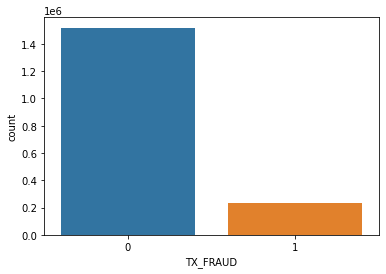

In [48]:
sns.countplot(data=df,x='TX_FRAUD')
plt.show()

# Ensemble Learning

In [49]:
models=[]
accuracy=[]

models.append(('logistic',LogisticRegression()))
models.append(('DT',DecisionTreeClassifier()))

In [50]:
models

[('logistic', LogisticRegression()), ('DT', DecisionTreeClassifier())]

In [51]:
for name,model_obj in models:
 model_obj.fit(xtrain,ytrain)
 ypred=model_obj.predict(xtest)
 ac=accuracy_score(ytest,ypred)
 accuracy.append(ac)

In [52]:
accuracy

[0.8940440515575385, 1.0]

In [53]:
ac_array=np.array(accuracy)
np.mean(ac_array)

0.9470220257787693

# Accuracy of the logistic and decision tree avarage is 94%

# Bagging

In [54]:
from sklearn.ensemble import BaggingClassifier

In [55]:
bg=BaggingClassifier(LogisticRegression())
bg.fit(xtrain,ytrain)       
ypred=bg.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94    455263
           1       0.61      0.62      0.61     70984

    accuracy                           0.89    526247
   macro avg       0.77      0.78      0.77    526247
weighted avg       0.89      0.89      0.89    526247



In [56]:
bg=BaggingClassifier(DecisionTreeClassifier())
bg.fit(xtrain,ytrain)
ypred=bg.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    455263
           1       1.00      1.00      1.00     70984

    accuracy                           1.00    526247
   macro avg       1.00      1.00      1.00    526247
weighted avg       1.00      1.00      1.00    526247



In [57]:
from sklearn.ensemble import VotingClassifier

In [58]:
vc=VotingClassifier(models)
vc.fit(xtrain,ytrain)
ypred=vc.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97    455263
           1       1.00      0.61      0.76     70984

    accuracy                           0.95    526247
   macro avg       0.97      0.81      0.87    526247
weighted avg       0.95      0.95      0.94    526247



In [59]:
vc=VotingClassifier(models,voting='hard')
vc.fit(xtrain,ytrain)
ypred=vc.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97    455263
           1       1.00      0.61      0.76     70984

    accuracy                           0.95    526247
   macro avg       0.97      0.81      0.87    526247
weighted avg       0.95      0.95      0.94    526247



# Boosting

In [60]:
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from sklearn.metrics import classification_report

In [61]:
ada=AdaBoostClassifier()
ada.fit(xtrain,ytrain)
ypred=ada.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    455263
           1       1.00      1.00      1.00     70984

    accuracy                           1.00    526247
   macro avg       1.00      1.00      1.00    526247
weighted avg       1.00      1.00      1.00    526247



In [62]:
gd=GradientBoostingClassifier()
gd.fit(xtrain,ytrain)
ypred=gd.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    455263
           1       1.00      1.00      1.00     70984

    accuracy                           1.00    526247
   macro avg       1.00      1.00      1.00    526247
weighted avg       1.00      1.00      1.00    526247



In [63]:
!pip install xgboost

In [64]:
from xgboost import XGBClassifier

In [65]:
xgb=XGBClassifier()
xgb.fit(xtrain,ytrain)
ypred=xgb.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    455263
           1       1.00      1.00      1.00     70984

    accuracy                           1.00    526247
   macro avg       1.00      1.00      1.00    526247
weighted avg       1.00      1.00      1.00    526247



# Conclusions:

1. All the models have similar performances, though, the Random Forest 
2. The Adaptive Boosting model rock a 100% specificity, which means they 
3. Correctly identified each negative (non fraudulent) transaction. 
4. They also have the best value for the precision metric, 100%, 
5. Which means that we can be very sure that if a transaction is fraudulent,
6. The models will very likely identify it as such.